Memanggil Library


> Pertama, kita load dulu berbagai library yang diperlukan:

> Numpy

> Matplotlib untuk membuat grafik

> Pandas

> SKlearn

> Itertools

**DENGAN 24 BARIS ANDA SUDAH BISA PYTHON DAN PENERAPAN MACHINE LEARNING MENGUNAKAN METODE K-NN**



In [4]:
import itertools #modul Python yang berisi beberapa fungsi built-in untuk menghasilkan urutan menggunakan iterator.
import numpy as np #modul python yang berisi MTK array
import matplotlib.pyplot as plt #kumpulan fungsi yang membuat beberapa perubahan pada gambar
from matplotlib.ticker import NullFormatter #untuk mengonfigurasi lokasi dan pemformatan centang. Pencari dan pemformat centang generik disediakan, serta yang khusus domain.
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker #untuk mengonfigurasi lokasi dan pemformatan centang. Pencari dan pemformat centang generik disediakan, serta yang khusus domain.
from sklearn import preprocessing
%matplotlib inline

Memanggil Dataset

Dataset
Pada praktikum ini, kita akan menggunakan dataset Iris. Dataset Iris merupakan dataset multivariate yang diperkenalkan oleh ahli statistika dan biologi inggris, Ronald Fisher, pada tahun 1936. Dataset bunga Iris ini sangat terkenal di dunia Machine Learning yang digunakan untuk ujicoba berbagai metode klasifikasi.

Dataset ini terdiri dari 3 spesies Iris yaitu Iris Setosa, Iris Virginica, dan Iris Versicolor dan tiap spesiesnya memiliki 50 sampel. Dalam data Iris terdapat 4 atribut yang dapat mempengaruhi klasifikasi yaitu, sepal length (panjang kelopak), sepal width (lebar kelopak), petal length (panjang bunga), dan petal width (lebar bunga) dalam centimeter yang berbeda-beda.

In [2]:
!wget -O pet.csv https://raw.githubusercontent.com/alifrzky123/belajar-orbit/1c59ed174a336e8928f6e7b159762003b09ec767/belajar_dataset/pet_store_records_2020.csv

--2021-10-05 13:17:32--  https://raw.githubusercontent.com/alifrzky123/belajar-orbit/1c59ed174a336e8928f6e7b159762003b09ec767/belajar_dataset/pet_store_records_2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48025 (47K) [text/plain]
Saving to: ‘pet.csv’

pet.csv             100%[===================>]  46.90K  --.-KB/s    in 0.007s  

2021-10-05 13:17:32 (6.38 MB/s) - ‘pet.csv’ saved [48025/48025]



**Load Dataset**

In [5]:
df = pd.read_csv('pet.csv')
df.head() #membaca 5 data dari paling atas

,product_id,product_category,sales,price,VAP,vendor_id,country,pet_size,pet_type,rating,re_buy
0,5040,Equipment,123,7293,0,VC_1605,Vietnam,small,fish,7,1
1,4567,Toys,61,9304,1,VC_1132,India,small,cat,10,0
2,4237,Toys,218,8180,0,VC_802,India,small,hamster,6,0
3,4364,Snack,69,18559,1,VC_929,India,large,dog,1,1
4,4184,Supplements,138,10283,1,VC_749,India,large,dog,10,0


**Visualisasi dan Analisis Data**

Coba kita tampilkan jumlah data per label

In [8]:
df['product_category'].value_counts()

Equipment      141
Snack          141
Toys           141
Medicine        76
Supplements     75
Food            75
Accessory       46
Clothes         46
Housing         46
Bedding         46
Grooming        46
Name: product_category, dtype: int64

**50 Iris-setosa, 50 Iris-virginica, dan 50 Iris-versicolor**

Kita juga dapat menampilkan histogram dari data, misalnya kolom SepalLength:

In [9]:
df.hist(column='product_category', bins=50)
# df.hist = untuk menampilkan histogram
# bins = intervar per-class

ValueError: ignored

**Feature set**

Selanjutnya, kita format dataset, yaitu bentuk feature sets (kumpulan atribut), kita bentuk variabel X:

In [ ]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Label'],
      dtype='object')

Untuk menggunakan library scikit-learn library, **kita harus convert format data frame-nya Panda, ke array Numpy :**

In [ ]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] .values  #.astype(float) merupakan tipe data
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

**Definisikan Labelnya juga (Y):**

In [ ]:
y = df['Label'].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

**Normalisasi Data**

K-NN merupakan metode yang didasarkan pada tingkat kedekatan antar-atribut. Oleh karena itu, sangat disarankan untuk melakukan normalisasi data agar perhitungan jarak menjadi lebih valid.

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float)) #Preprocessing = SKlearn 
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

**Pembagian Data Training dan Testing**

Untuk menghasilkan model yang baik, perlu dilakukan pengujian yang baik. Aturan umum yang berlaku adalah data training dan testing harus dipisahkan terlebih dahulu. Dengan kata lain tidak boleh menggunakan data yang sama untuk training dan testing.

Pembagian dataset dapat dilakukan dengan mekanisme A atau B seperti tersaji pada gambar berikut:
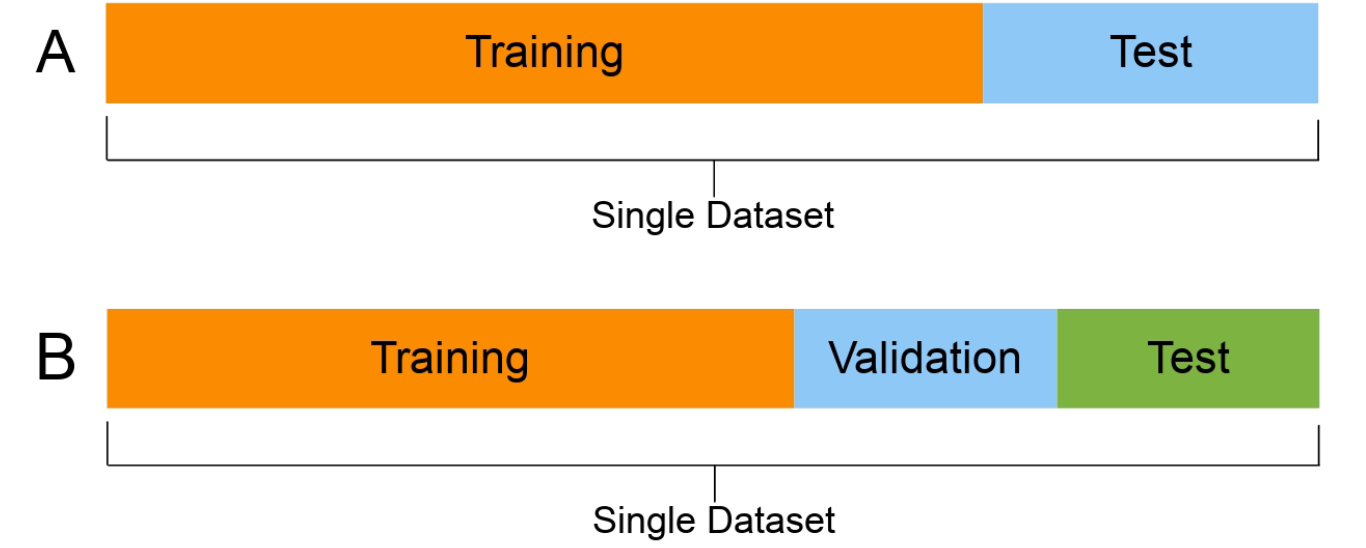

Untuk mempermudah, **kali ini kita pake skenario A**, hanya membagi dataset menjadi data training dan testing. Untuk komposisi yang digunakan **sebesar 80% data training dan 20% data testing.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


**Klasifikasi**

**K nearest neighbor (K-NN)**

Import library

Import classifier K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Training**

Pertama, tentukan nilai k. Kita akan coba dengan nikai k=10:

In [ ]:
k = 10
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

**Predicting**

Kita sudah dapat menggunakan **model** yang terbentuk **untuk memprediksikan data**

In [ ]:
yhat = knn.predict(X_test)
yhat[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

**Perhitungan Akurasi**

Pada klasifikasi multi-kelas, **nilai akurasi klasifikasi** secara sederhana dapat dihitung dengan memperbandingkan kelas **hasil prediksi algoritma** dengan kelas sebenarnya / actual class.

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.975
Test set Accuracy:  0.9333333333333333


**MENCARI NILAI TERBAIK**

Performa dari model **K-NN sangat bergantung dengan nilai K**. Lalu bagaimana memilih nilai K yang terbaik? Jawabnya, kita harus lakukan pengujian.

Kode berikut ini bertujuan untuk melakukan pengujian nilai **k dari k=1 s.d k=10.**

In [ ]:
#Ks = 10
mean_acc = np.zeros((k-1))
std_acc = np.zeros((k-1))
ConfustionMx = [];
for n in range(1,k):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.9       , 0.93333333, 0.9       , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333])

**Lalu kita juga bisa menampilkan grafik / plot-nya**

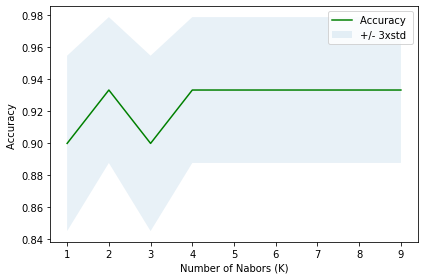

In [ ]:
plt.plot(range(1,k),mean_acc,'g')
plt.fill_between(range(1,k),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9333333333333333 with k= 2


**LATIHAN IN CASE**

1. Mengunakan dataset local 
2. Practice coding with Google Colab atau Jupyter Notebook https://colab.research.google.com/notebooks/intro.ipynb?utm_source=scs-index#recent=true
4. Ikuti langkah langkah yang sudah di berikan
5. Membuat Account GitHub https://github.com/

**CODING BUKAN UNTUK DI HAFAL MELAINKAN DI PAHAMI KONSEP DAN LOGIKA**

**SELAMAT ANDA SUDAH BISA PYTHON**